In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
#data = np.loadtxt('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv')
data = pd.read_csv('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv', sep=' ; ')
bad_rows = np.where((data['Longitude'] > 180) | (data['Longitude'] < -180) |
                    (data['Latitude'] > 180) | (data['Latitude'] < -180))[0]

data = data.drop(data.index[bad_rows])
data['Date'] = data['Date'].str.replace('/', '-')
data['Date'] = pd.to_datetime(data['Date'])
data['Wind speed'] = pd.to_numeric(data['Wind speed'])
data['Wind dir'] = pd.to_numeric(data['Wind dir'])

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


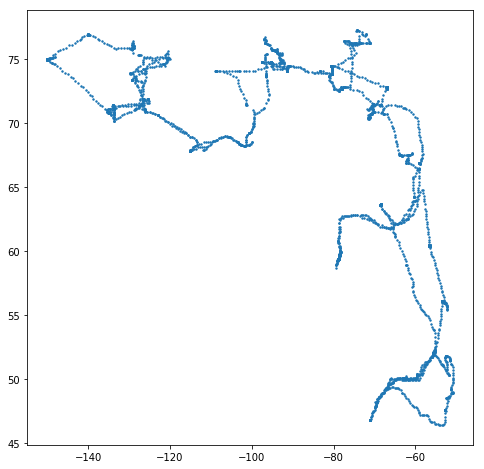

In [157]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Longitude'], data['Latitude'], s=2)
plt.show()

In [158]:
from icedef import metocean, test_case

In [159]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

In [160]:
time_frame

(numpy.datetime64('2015-05-06T15:27:39.000000'),
 numpy.datetime64('2015-05-07T06:25:51.000000'))

In [161]:
start_row = np.where(data['Date'] < start_time)[0][-1] + 1
end_row = np.where(data['Date'] > end_time)[0][0] - 1

In [162]:
df = data[start_row : end_row + 1]

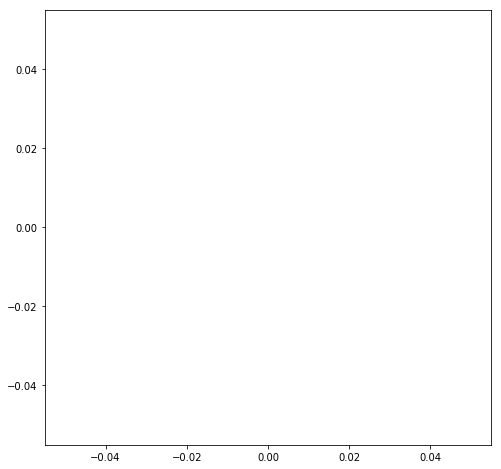

In [163]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=2)
plt.show()

In [164]:
df

,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure


In [165]:
end_row

448

In [166]:
print(f'Time frame: {time_frame}')
data[start_row - 2 : end_row + 10]

Time frame: (numpy.datetime64('2015-05-06T15:27:39.000000'), numpy.datetime64('2015-05-07T06:25:51.000000'))


,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure
447,2015-05-05 22:00:00,46.8,-71.2,20,5,18.2,NaN,-1.5,1019.8
448,2015-05-05 23:00:00,46.8,-71.2,20,11,14.9,NaN,2.3,1020.8
449,2015-07-10 00:00:00,46.8,-71.2,20,2,23.2,NaN,14.3,1011.1
450,2015-07-10 01:00:00,46.8,-71.2,10,5,22.5,NaN,16.0,1011.0
451,2015-07-10 02:00:00,46.8,-71.2,250,1,22.4,NaN,15.0,1010.7
452,2015-07-10 03:00:00,46.8,-71.2,20,4,21.1,NaN,16.2,1010.8
453,2015-07-10 04:00:00,46.8,-71.2,30,4,20.5,NaN,14.3,1010.6
454,2015-07-10 05:00:00,46.8,-71.2,0,0,20.2,NaN,15.0,1010.4
455,2015-07-10 06:00:00,46.8,-71.2,280,2,20.2,NaN,14.2,1010.2
456,2015-07-10 07:00:00,46.8,-71.2,220,1,19.2,NaN,14.0,1010.3


In [167]:
start_row = np.where(data['Date'] < end_time)[0][-1] + 1
end_row = np.where(data['Date'] > (end_time + np.timedelta64(5, 'D')))[0][0] - 1

In [168]:
end_time2 = end_time + np.timedelta64(5, 'D')
np.where(data['Date'] > end_time2)[0][0] - 1

448

In [206]:
df = data[279:314].reset_index(drop=True)

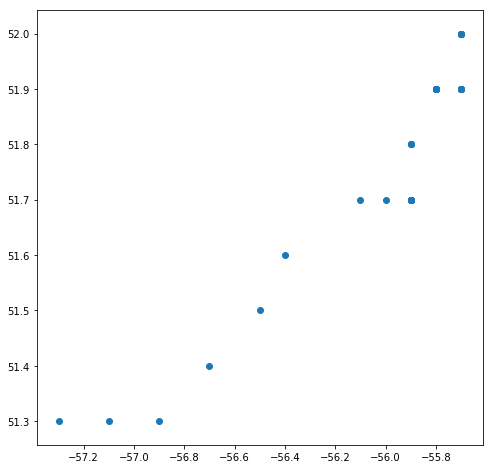

In [207]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

Wind direction is measured in degrees clockwise from True North


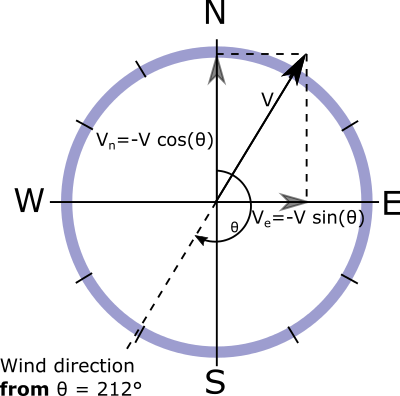

In [171]:
from IPython.display import Image
print('Wind direction is measured in degrees clockwise from True North')
Image(filename='/home/evankielley/Downloads/wind_direction.png') 

In [208]:
atm_data = metocean.NARRAtmosphere((np.datetime64(df['Date'][0]), np.datetime64(df['Date'][len(df)-1])))

Attempting to download ftp://data.munroelab.ca/pub/NARR/atm/daily/20150428.nc... done.
Attempting to download ftp://data.munroelab.ca/pub/NARR/atm/daily/20150429.nc... done.
Attempting to download ftp://data.munroelab.ca/pub/NARR/atm/daily/20150430.nc... done.


In [209]:
lat0, lon0, time0, wind_speed0, wind_dir0 = df['Latitude'][0], df['Longitude'][0], np.datetime64(df['Date'][0]), \
                                            df['Wind speed'][0], df['Wind dir'][0]
eastward_wind_velocity0 = -wind_speed0 * np.cos(wind_dir0)
northward_wind_velocity0 = -wind_speed0 * np.sin(wind_dir0)

In [210]:
eastward_wind_velocity0

14.672637356349762

In [211]:
atm_data.eastward_wind_velocities.interp(latitude=lat0, longitude=lon0, time=time0, assume_sorted=True)

<xarray.DataArray ()>
array(-6.472849)
Coordinates:
    latitude   float64 52.0
    longitude  float64 -55.7
    time       datetime64[ns] 2015-04-28T21:00:00
Attributes:
    standard_name:  eastward_wind
    long_name:      3-hourly u-wind at 10 m
    units:          m/s
    GRIB_id:        33
    GRIB_name:      UGRD
    dataset:        NARR 3-hourly
    level_desc:     10 m
    parent_stat:    Other
    statistic:      Individual Obs
    var_desc:       u-wind
    actual_range:   [-41.542862  29.228455]

In [213]:
northward_wind_velocity0

-16.392489530545674

In [212]:
atm_data.northward_wind_velocities.interp(latitude=lat0, longitude=lon0, time=time0, assume_sorted=True)

<xarray.DataArray ()>
array(-8.221155)
Coordinates:
    latitude   float64 52.0
    longitude  float64 -55.7
    time       datetime64[ns] 2015-04-28T21:00:00
Attributes:
    standard_name:  northward_wind
    long_name:      3-hourly v-wind at 10 m
    units:          m/s
    GRIB_id:        34
    GRIB_name:      VGRD
    dataset:        NARR 3-hourly
    level_desc:     10 m
    parent_stat:    Other
    statistic:      Individual Obs
    var_desc:       v-wind
    actual_range:   [-32.7715    31.337936]

In [189]:
np.where((data['Longitude'] > -60) & (data['Longitude'] < -40) & (data['Latitude'] > 40) & (data['Latitude'] < 60))

(array([  50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
          61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
          83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
         105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
         116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
         127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
         149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
         193,  194,  195,  196,  197, 

In [198]:
data['Date'][289:314]

289   2015-04-29 07:00:00
290   2015-04-29 08:00:00
291   2015-04-29 09:00:00
292   2015-04-29 10:00:00
293   2015-04-29 11:00:00
294   2015-04-29 12:00:00
295   2015-04-29 13:00:00
296   2015-04-29 14:00:00
297   2015-04-29 15:00:00
298   2015-04-29 16:00:00
299   2015-04-29 17:00:00
300   2015-04-29 18:00:00
301   2015-04-29 19:00:00
302   2015-04-29 20:00:00
303   2015-04-29 21:00:00
304   2015-04-29 22:00:00
305   2015-04-29 23:00:00
306   2015-04-30 00:00:00
307   2015-04-30 01:00:00
308   2015-04-30 02:00:00
309   2015-04-30 03:00:00
310   2015-04-30 04:00:00
311   2015-04-30 05:00:00
312   2015-04-30 06:00:00
313   2015-04-30 07:00:00
Name: Date, dtype: datetime64[ns]